1)


In [ ]:
#import relavant modules
!pip install pydub==0.25.1
import librosa , librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import IPython.display as ipd

In [ ]:
#convert from mp3 to wav
sound = AudioSegment.from_mp3("crash.mp3")
sound.export("crash.wav", format="wav")
audio_data, sr = librosa.load('crash.wav')

In [ ]:
#load audio file
audio_data , sr = librosa.load('crash.wav')

In [ ]:
#add gaussian noise
noise_factor = 0.03
noise = np.random.randn(len(audio_data))
noisy_audio = audio_data + noise_factor * noise

In [ ]:
#Function to play audio
def play_audio(audio,sr):
  ipd.display(ipd.Audio(audio, rate=sr))

#Function to plot audio time series
def plot_audio(audio, sr, title):
  plt.figure(figsize=(10, 4))
  librosa.display.waveshow(audio, sr=sr)
  plt.title(title)
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.show()

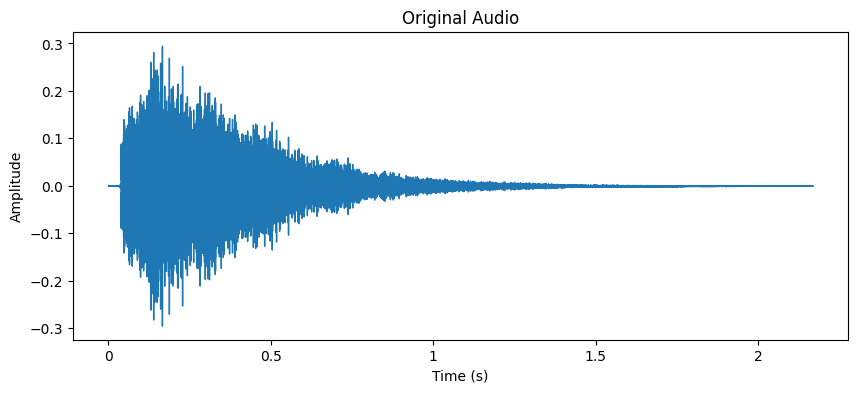

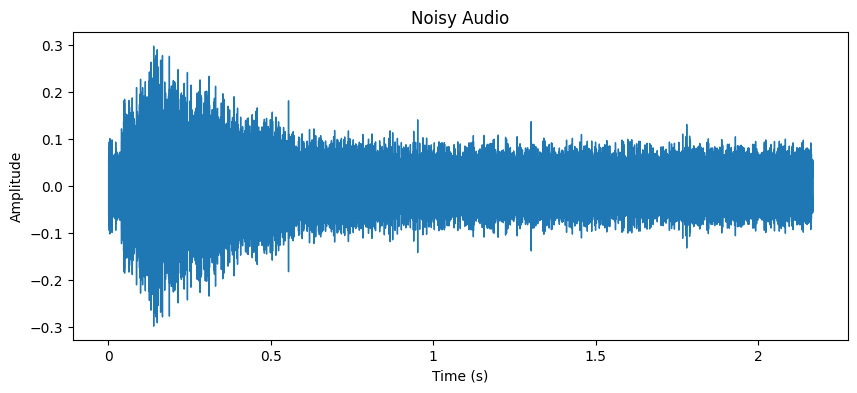

In [ ]:
#play and plot original audio
play_audio(audio_data, sr)
plot_audio(audio_data, sr, "Original Audio")
#play and plot noisy audio
play_audio(noisy_audio, sr)
plot_audio(noisy_audio, sr, "Noisy Audio")


2)

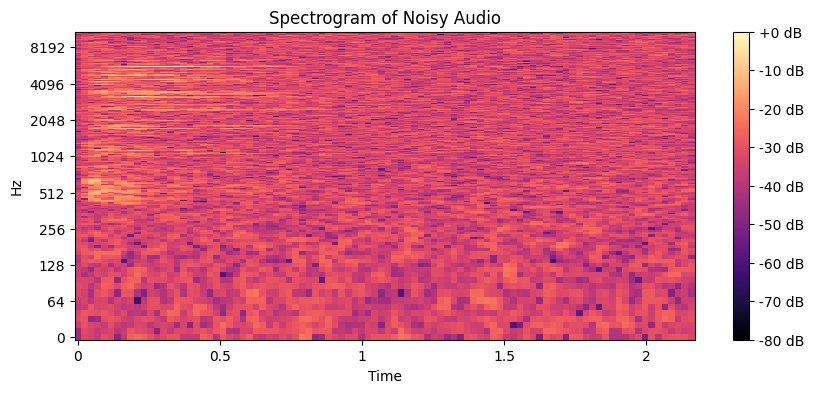

In [ ]:
plt.figure(figsize=(10, 4))
conversion = librosa.amplitude_to_db(np.abs(librosa.stft(noisy_audio)), ref=np.max)
librosa.display.specshow(conversion, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Noisy Audio')
plt.show()

3)

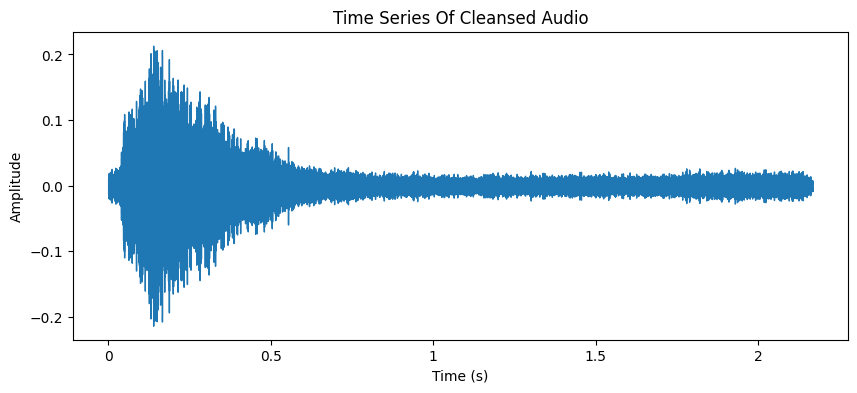

In [ ]:
!pip install noisereduce==3.0.0
import noisereduce as nr
cleansed_audio = nr.reduce_noise(y=noisy_audio, sr=sr)
plot_audio(cleansed_audio, sr, "Time Series Of Cleansed Audio")

4)

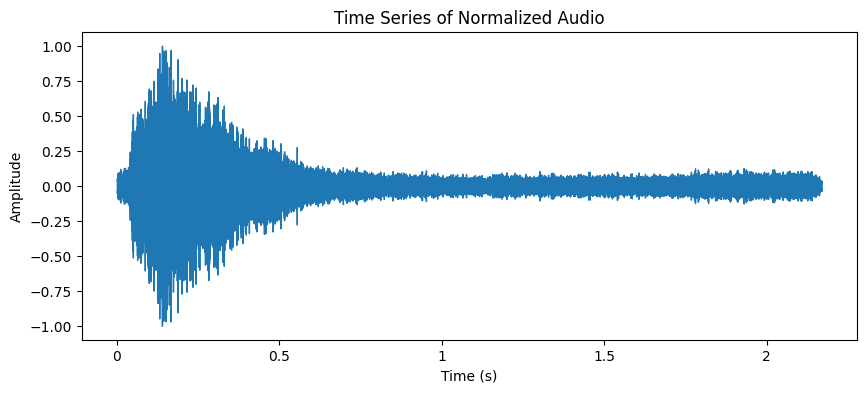

In [ ]:
normalized_audio = librosa.util.normalize(cleansed_audio)
plot_audio(normalized_audio, sr, "Time Series of Normalized Audio")

5)

In [ ]:
import scipy.signal

# 1. Pre-emphasis
pre_emphasis = 0.97
emphasized_signal = scipy.signal.lfilter([1, -pre_emphasis], [1], normalized_audio)

# 2. Framing
frame_size = 0.025  # 25 ms
frame_stride = 0.01  # 10 ms
frame_length, hop_length = int(sr * frame_size), int(sr * frame_stride)
frames = librosa.util.frame(emphasized_signal, frame_length=frame_length, hop_length=hop_length)

# 3. Windowing
frames = frames * np.hamming(frames.shape[1])

# 4. FFT
NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))

# 5. Mel-filterbank
nfilt = 40
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=NFFT, n_mels=nfilt)
mel_spectrogram = np.dot(mel_filterbank, (mag_frames.T)**2)

# 6. Logarithm
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

# 7. DCT
num_ceps = 12
mfccs = scipy.fftpack.dct(log_mel_spectrogram, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)]


6)

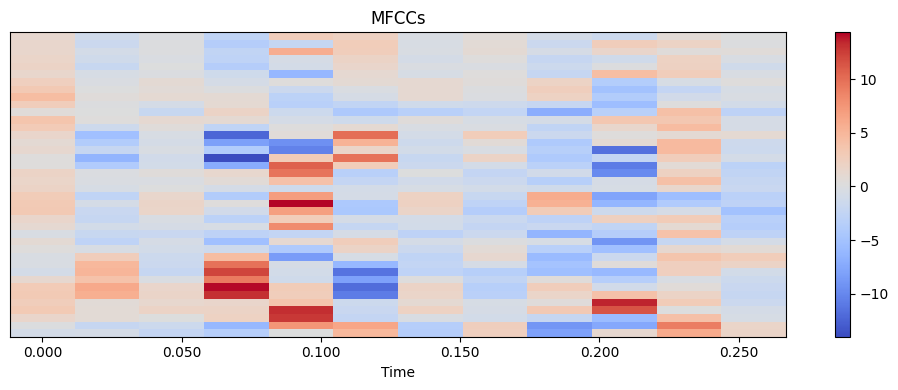

In [ ]:

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()